In [4]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [6]:
x_train.shape

(60000, 784)

In [8]:
x_test.shape

(10000, 784)

In [9]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.6590 - acc: 0.8316
Epoch 2/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.3440 - acc: 0.9032
Epoch 3/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.2980 - acc: 0.9157
Epoch 4/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.2706 - acc: 0.9242
Epoch 5/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.2497 - acc: 0.9301


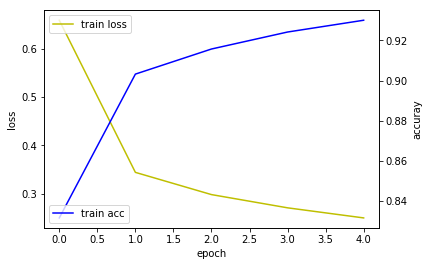

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [13]:
loss, acc = model.evaluate(x_test, y_test, batch_size=32)
print('loss: ', loss)
print('acc: ', acc*100, '%')

10000/10000 [==============================] - 0s 22us/step
loss:  0.235565514326
acc:  93.42 %


In [14]:
x_test_set = x_test[0:1]
result = model.predict(x_test_set)
print(result)

[[  5.49369543e-05   6.62097591e-07   5.58941450e-04   3.25408159e-03
    1.68996780e-06   5.86892602e-05   7.26459746e-08   9.94924068e-01
    1.24179307e-04   1.02269056e-03]]
